In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
IBM_Walmart = yf.download(tickers= 'IBM WMT', period = '5y', interval = '1mo', rounding = True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


In [3]:
IBM_Walmart = IBM_Walmart['Close']

In [4]:
IBM_Walmart

Ticker,IBM,WMT
Date,,
2020-06-01,92.46,37.18
2020-07-01,94.12,40.16
2020-08-01,94.40,43.10
2020-09-01,94.37,43.60
2020-10-01,86.60,43.24
2020-11-01,95.80,47.62
2020-12-01,99.05,44.93
2021-01-01,93.72,43.95
2021-02-01,93.58,40.64


<Axes: xlabel='Date'>

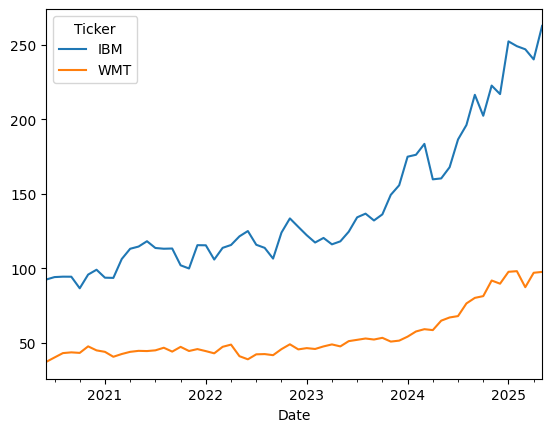

In [5]:
IBM_Walmart.plot()

In [6]:
IBM_Walmart.corr()

Ticker,IBM,WMT
Ticker,,
IBM,1.000000,0.960125
WMT,0.960125,1.000000


In [7]:
f"{IBM_Walmart['IBM'].corr(IBM_Walmart['WMT']):.3f}"

'0.960'

# Creación de modelo de predicción para Walmart

In [8]:
import statsmodels.api as sm

df_IBM_Walmart = sm.add_constant(IBM_Walmart)
modelo = sm.OLS(df_IBM_Walmart['WMT'], df_IBM_Walmart[['const','IBM']]).fit()

In [9]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    WMT   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     684.1
Date:                Tue, 27 May 2025   Prob (F-statistic):           8.55e-34
Time:                        13:36:02   Log-Likelihood:                -178.85
No. Observations:                  60   AIC:                             361.7
Df Residuals:                      58   BIC:                             365.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7289      1.979      2.894      0.0

## Decomposición

In [10]:
IBM = yf.download(tickers= 'IBM', period = '5y', interval = '1d', rounding = True)
IBM = IBM["Close"]
Walmart = yf.download(tickers= 'WMT', period = '5y', interval = '1d', rounding = True)
Walmart = Walmart["Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
IBM

Ticker,IBM
Date,
2020-05-27,96.11
2020-05-28,95.34
2020-05-29,95.62
2020-06-01,95.61
2020-06-02,96.46
...,...
2025-05-20,266.95
2025-05-21,260.87
2025-05-22,258.37


In [12]:
decomposed_IBM = sm.tsa.seasonal_decompose(IBM, period=30)
decomposed_Walmart = sm.tsa.seasonal_decompose(Walmart, period=30)

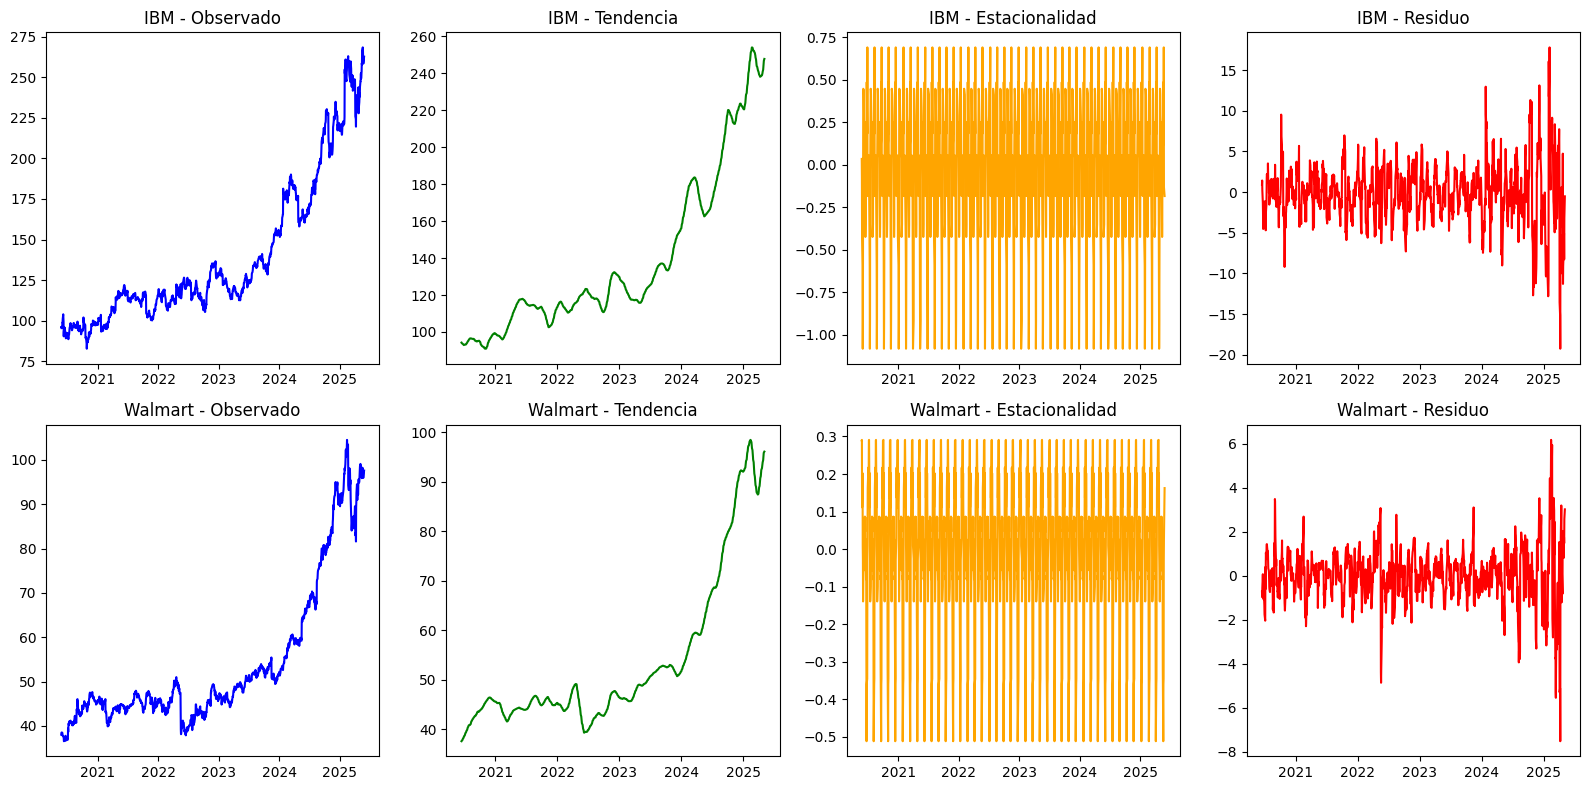

In [13]:
# Descomposición estacional
decomposed_IBM = sm.tsa.seasonal_decompose(IBM, period=30)
decomposed_Walmart = sm.tsa.seasonal_decompose(Walmart, period=30)

# Gráficos
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# IBM - Descomposición
axes[0, 0].plot(decomposed_IBM.observed, label="Observado", color="blue")
axes[0, 0].set_title("IBM - Observado")
axes[0, 1].plot(decomposed_IBM.trend, label="Tendencia", color="green")
axes[0, 1].set_title("IBM - Tendencia")
axes[0, 2].plot(decomposed_IBM.seasonal, label="Estacionalidad", color="orange")
axes[0, 2].set_title("IBM - Estacionalidad")
axes[0, 3].plot(decomposed_IBM.resid, label="Residuo", color="red")
axes[0, 3].set_title("IBM - Residuo")

# Walmart - Descomposición
axes[1, 0].plot(decomposed_Walmart.observed, label="Observado", color="blue")
axes[1, 0].set_title("Walmart - Observado")
axes[1, 1].plot(decomposed_Walmart.trend, label="Tendencia", color="green")
axes[1, 1].set_title("Walmart - Tendencia")
axes[1, 2].plot(decomposed_Walmart.seasonal, label="Estacionalidad", color="orange")
axes[1, 2].set_title("Walmart - Estacionalidad")
axes[1, 3].plot(decomposed_Walmart.resid, label="Residuo", color="red")
axes[1, 3].set_title("Walmart - Residuo")

plt.tight_layout()
plt.show()


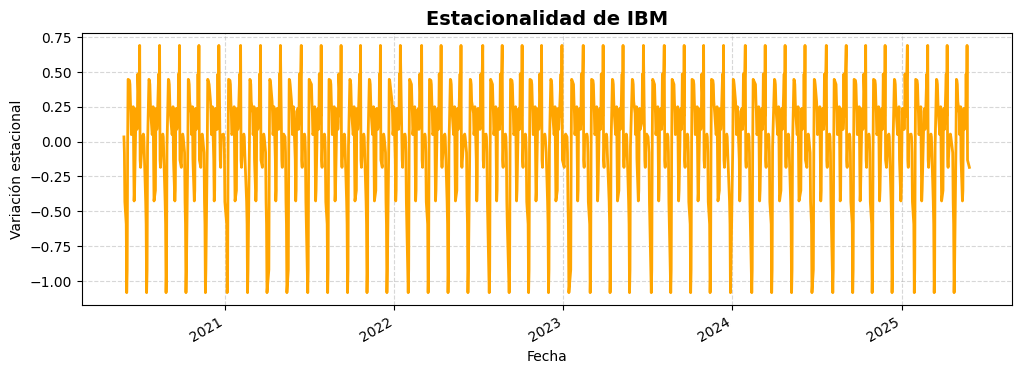

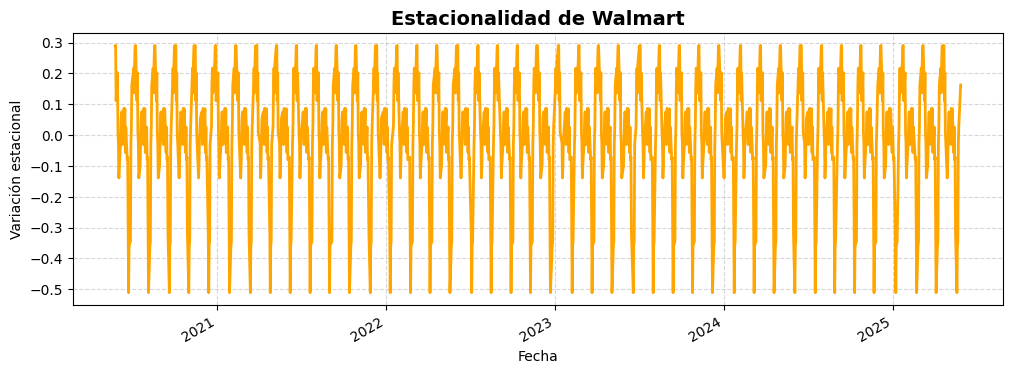

In [14]:
# Gráfico de la estacionalidad de IBM
plt.figure(figsize=(12, 4))  # Aumenta el tamaño horizontal
decomposed_IBM.seasonal.plot(color="orange", linewidth=2)
plt.title("Estacionalidad de IBM", fontsize=14, fontweight="bold")
plt.xlabel("Fecha")
plt.ylabel("Variación estacional")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Gráfico de la estacionalidad de Walmart
plt.figure(figsize=(12, 4))  # Aumenta el tamaño horizontal
decomposed_Walmart.seasonal.plot(color="orange", linewidth=2)
plt.title("Estacionalidad de Walmart", fontsize=14, fontweight="bold")
plt.xlabel("Fecha")
plt.ylabel("Variación estacional")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### Se puede observar como las acciones y las tendencias tienen mucha similitud pero es llamativo como ha cambiado el ruido a finales de año, esto quiere que ha sido muy volatil los cambios de las accions y menos predecibles.

## Autorcorrelación de las dos empresas:

In [15]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [16]:
IBM = yf.download(tickers= 'IBM', period = '5y', interval = '1d', rounding = True)
IBM = IBM["Close"]
Walmart = yf.download(tickers= 'WMT', period = '5y', interval = '1d', rounding = True)
Walmart = Walmart["Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
print(acf(IBM['IBM'])), print(acf(Walmart['WMT']))

[1.         0.99528416 0.99077082 0.98620253 0.98152015 0.97669027
 0.97183978 0.96709536 0.9624474  0.95816575 0.95374235 0.94942999
 0.94504341 0.94066557 0.93618167 0.93202334 0.92793394 0.92406906
 0.92039348 0.91666087 0.91300958 0.90964245 0.90658984 0.90371439
 0.89993075 0.89652611 0.89320476 0.88977355 0.88655253 0.88320221
 0.88001065]
[1.         0.99561818 0.99135539 0.98706898 0.98269769 0.978333
 0.97403474 0.96965011 0.9653504  0.96081863 0.95649263 0.95178033
 0.94717036 0.94240174 0.93732954 0.93228375 0.92712222 0.92198804
 0.91718444 0.91247072 0.90788778 0.90351053 0.89919084 0.8949598
 0.89083356 0.88676667 0.88306846 0.87926435 0.87591424 0.87244172
 0.86888946]


(None, None)

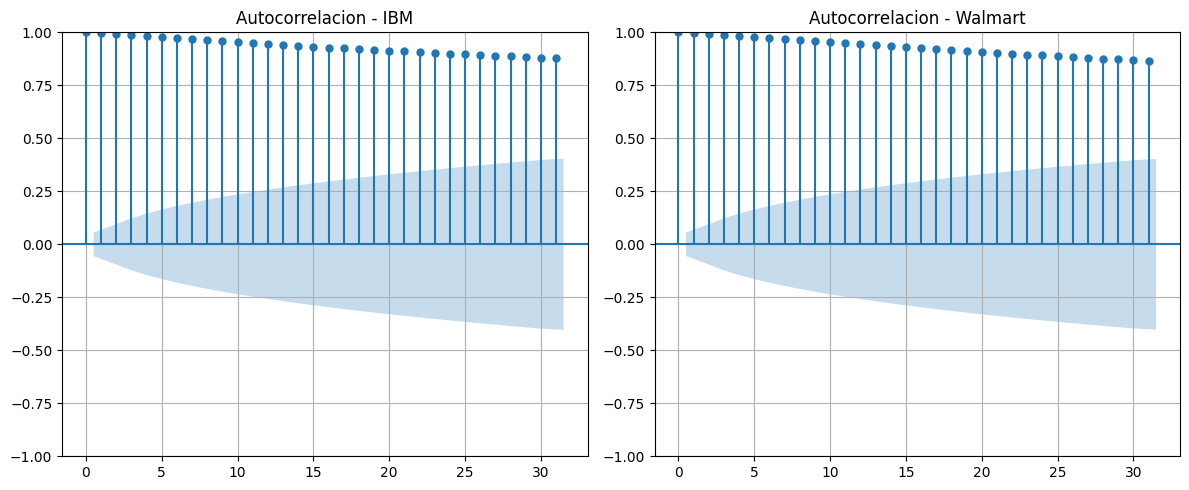

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))  # 1 fila, 2 columnas


plot_acf(IBM['IBM'], alpha=0.05, ax=axes[0])  # Primer gráfico en la primera columna
axes[0].set_title("Autocorrelacion - IBM")
axes[0].grid(True)

plot_acf(Walmart['WMT'], alpha=0.05, ax=axes[1])  # Segundo gráfico en la segunda columna
axes[1].set_title("Autocorrelacion - Walmart")
axes[1].grid(True)

plt.tight_layout()  # Ajusta el espacio entre subplots
plt.show()

# Prueba de caminata aleatoria (Dickey-Fuller)

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
adfuller(IBM)[1],  adfuller(Walmart)[1]

(0.9917644218820719, 0.9958136274049424)

In [21]:
if adfuller(IBM)[1] > 0.8 :
    print(f"La prueba tiene tendencia a una caminata aleatoria: {adfuller(IBM)[1]:.3f}")
elif adfuller(IBM)[1] < 0.8 :
    print(f"La prueba NO tiene tendencia a una caminata aleatoria: {adfuller(IBM)[1]:.3f}")
    

La prueba tiene tendencia a una caminata aleatoria: 0.992


In [22]:
if adfuller(Walmart)[1] > 0.8 :
    print(f"La prueba tiene tendencia a una caminata aleatoria: {adfuller(Walmart)[1]:.3f}")
elif adfuller(Walmart)[1] < 0.8 :
    print(f"La prueba NO tiene tendencia a una caminata aleatoria: {adfuller(Walmart)[1]:.3f}")

La prueba tiene tendencia a una caminata aleatoria: 0.996


### Esto quiere decir que no se puede predecir ninguna accion de las empresas ya que no tienen patrones similares. 

# Medias móviles

In [23]:
IBM_Walmart_dias = yf.download(tickers= 'IBM WMT', period = '5y', interval = '1d', rounding = True)['Close']

[*********************100%***********************]  2 of 2 completed


In [24]:
IBM_Walmart_dias.isnull().sum()

Ticker
IBM    0
WMT    0
dtype: int64

In [25]:
IBM_Walmart_dias = IBM_Walmart_dias.reset_index()

## Como se realizará una prediccon al día siguiente se agregará una fila vac

In [26]:
# Crear una nueva fila con NaN
nueva_fila = pd.DataFrame([[np.nan, np.nan, np.nan]], columns=IBM_Walmart_dias.columns)

# Agregar la fila al final del DataFrame
IBM_Walmart_dias = pd.concat([IBM_Walmart_dias, nueva_fila])

# Mostrar los últimos valores para verificar
print(IBM_Walmart_dias.tail())

Ticker       Date     IBM    WMT
1253   2025-05-21  260.87  96.43
1254   2025-05-22  258.37  95.93
1255   2025-05-23  258.63  96.34
1256   2025-05-27  262.70  97.58
0             NaT     NaN    NaN


In [27]:
rolling_IBM = IBM_Walmart_dias['IBM'].rolling(30).mean()

rolling_IBM = rolling_IBM.shift(1).fillna(method='ffill')  # Rellena el NaN con el último valor


rolling_Walmart = IBM_Walmart_dias['WMT'].rolling(30).mean()

rolling_Walmart = rolling_Walmart.shift(1).fillna(method='ffill')  # Rellena el NaN con el último valor

In [28]:
rolling_IBM.tail()

1253    244.149667
1254    245.526333
1255    246.347000
1256    247.367000
0       248.326333
Name: IBM, dtype: float64

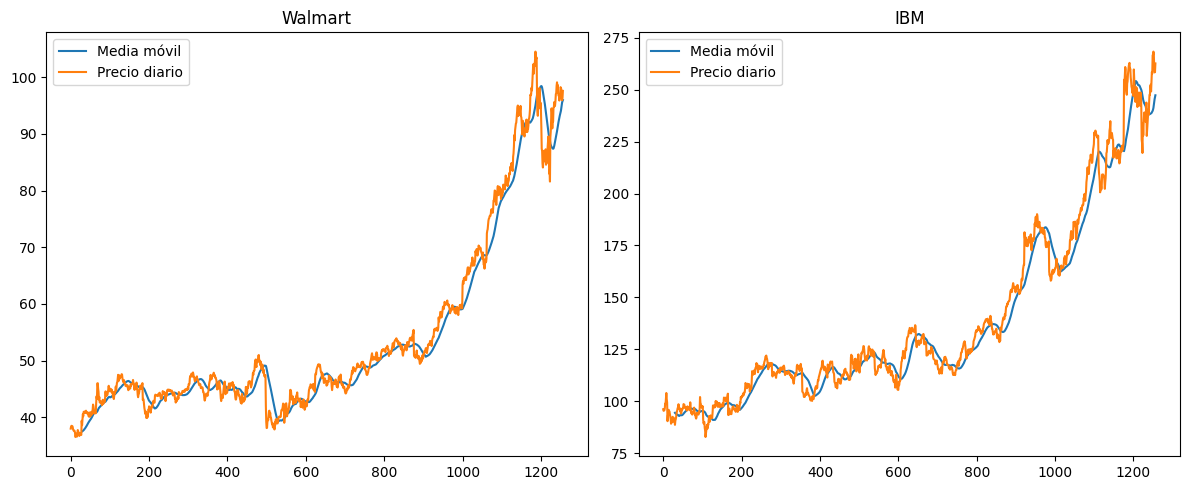

In [29]:
fig, axes =  plt.subplots(1, 2,  figsize=(12, 5))


# Walmart
rolling_Walmart[:-1].plot(ax=axes[0], label="Media móvil")
IBM_Walmart_dias['WMT'].plot(ax=axes[0], label="Precio diario")
axes[0].set_title("Walmart")
axes[0].legend() 

# IBM
rolling_IBM[:-1].plot(ax=axes[1], label="Media móvil")
IBM_Walmart_dias['IBM'].plot(ax=axes[1], label="Precio diario")
axes[1].set_title("IBM")
axes[1].legend()  

plt.tight_layout()  # Optimiza el espacio entre subplots
plt.show()

In [30]:
IBM_Walmart_dias['IBM'].tail()

1253    260.87
1254    258.37
1255    258.63
1256    262.70
0          NaN
Name: IBM, dtype: float64

In [31]:
rolling_IBM.tail()

1253    244.149667
1254    245.526333
1255    246.347000
1256    247.367000
0       248.326333
Name: IBM, dtype: float64

In [32]:
pred_df = pd.concat((IBM_Walmart_dias['IBM'], rolling_IBM), axis=1)
pred_df.columns = ['observado', 'pronosticado']

In [33]:
pred_df[:35]

,observado,pronosticado
0,96.11,NaN
1,95.34,NaN
2,95.62,NaN
3,95.61,NaN
4,96.46,NaN
5,98.80,NaN
6,98.68,NaN
7,101.10,NaN
8,103.93,NaN
9,100.96,NaN


In [47]:
pred_df.tail()

,observado,pronosticado
1253,260.87,244.149667
1254,258.37,245.526333
1255,258.63,246.347000
1256,262.70,247.367000
0,NaN,248.326333


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
IBM_df = IBM_Walmart_dias['IBM'].reset_index()

In [60]:
x_train, x_test, x_pron, x_pron_test = train_test_split(pred_df['observado'][30:-1], pred_df['pronosticado'][30:-1],  test_size= 0.3, random_state=1)

In [61]:
x_pron_test.head()

156      98.140333
138      92.939333
1068    184.392000
493     115.723000
331     113.971333
Name: pronosticado, dtype: float64

In [62]:
from sklearn.metrics import mean_squared_error

# Calcular RMSE y MAPE
rmse = np.sqrt(mean_squared_error(x_test, x_pron_test)).round(2)
mape = np.round(np.mean(np.abs((x_test - x_pron_test) / x_test)) * 100, 2)

# Mostrar los resultados
print("Root Mean Squared Error =", rmse, "\n\n" 
      "Mean Absolute Percentage Error =", mape)


Root Mean Squared Error = 8.04 

Mean Absolute Percentage Error = 3.99
